Population size: 3000
Infected at t=0: 7
R0= 2.6
R_eff=1 at t= 28 d


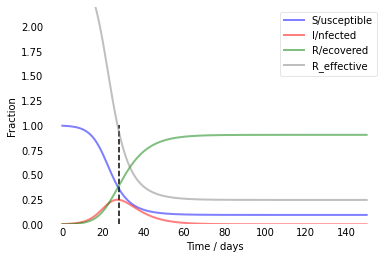

In [5]:
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Population size
N = 3000

# Initial conditions: 1 Infected, no Recovered individuals
I0, R0 = 7, 0 #case zero

# All others, S=N-I-R susceptible, initially S0=N-I0-R0
S0 = N - I0 - R0 #normalization

# Contact rate, beta; recovery rate, gamma
beta, gamma = 0.39, 0.15

# Basic reproduction number R0 (speak R nought), average number of individuals that get infected over
# the period where an infected person is infectious at time 0 where no one is infected 
R_nought = beta / gamma

# by pure logic, or following the literature
# https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1a-epidemiology/epidemic-theory
# R_effective = R_nought * S/N, as used in the plot

print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",R_nought)

# A grid of time points (in days)
t = np.linspace(0, 150, 150)

# SIR model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

#1/gamma average time to recover

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # return vector

#find R_effective = 1 time
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time]/N < 1: 
        t_1 = time
        break
print("R_eff=1 at t=", t_1, "d")


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,2.2)
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()